# Ejercicio 2

### Tome una foto con la cámara de su computador, imprima sus características como tamaño y forma, luego recórtela para que solo se pueda observar los ojos de una persona.

Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.
¡Foto guardada como foto_micara.jpg!

--- CARACTERÍSTICAS DE LA IMAGEN ---
Resolución: 640 x 480
Modo de color: RGB


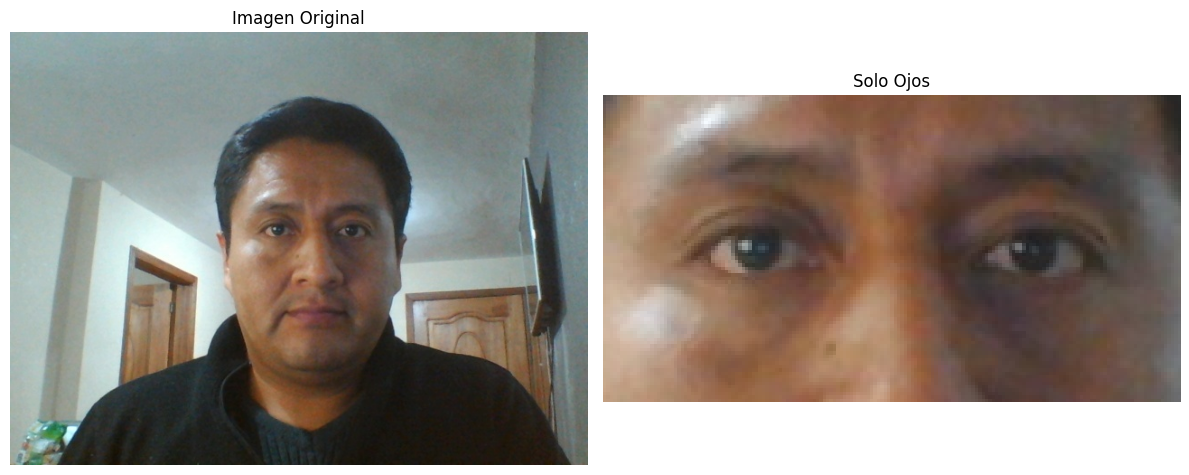

In [10]:
import cv2                 # Solo para la parte de la cámara
from PIL import Image
import matplotlib.pyplot as plt

# PASO 1: CAPTURA (Pillow no hace esta parte)
# 1.1 Inicializar la cámara (0 es la cámara por defecto)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")
else:
    print("Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.")

    while True:
        # 1.2. Leer un frame de la cámara
        ret, frame = cap.read()

        if not ret:
            print("Error al capturar el video.")
            break

        # 1.3. Mostrar el video en vivo en una ventana
        cv2.imshow('Presiona S para tomar foto', frame)

        # 1.4. Escuchar el teclado
        key = cv2.waitKey(1) & 0xFF

        if key == ord('s'):  # Si presiona 's', guarda la imagen
            nombre_foto = "foto_micara.jpg"
            cv2.imwrite(nombre_foto, frame)
            print(f"¡Foto guardada como {nombre_foto}!")
            break
        
        elif key == ord('q'):  # Si presiona 'q', sale sin guardar
            break

    # 1.5. Liberar la cámara y cerrar ventanas
    cap.release()
    cv2.destroyAllWindows()


# PASO 2: CARGA Y ANÁLISIS DE LA IMAGEN

img_cv = cv2.imread("foto_micara.jpg")

if img_cv is None:
    print("Error: No se pudo cargar la imagen.")
    exit()

img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
img_pil = Image.fromarray(img_rgb)

ancho, alto = img_pil.size
modo = img_pil.mode

print("\n--- CARACTERÍSTICAS DE LA IMAGEN ---")
print(f"Resolución: {ancho} x {alto}")
print(f"Modo de color: {modo}")

# 3: CARGAR CLASIFICADORES 

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

eye_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_eye.xml"
)


# 4: DETECCIÓN AUTOMÁTICA DE ROSTRO Y OJOS

gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=5
)

region_ojos = None

for (x, y, w, h) in faces:
    rostro_gray = gray[y:y+h, x:x+w]
    rostro_color = img_rgb[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(
        rostro_gray,
        scaleFactor=1.1,
        minNeighbors=10
    )

    if len(eyes) >= 2:
        
        eyes = sorted(eyes, key=lambda e: e[0])[:2]

        x_min = min(eyes[0][0], eyes[1][0])
        y_min = min(eyes[0][1], eyes[1][1])
        x_max = max(eyes[0][0] + eyes[0][2], eyes[1][0] + eyes[1][2])
        y_max = max(eyes[0][1] + eyes[0][3], eyes[1][1] + eyes[1][3])

        
        margen_x = int(0.15 * (x_max - x_min))
        margen_y = int(0.40 * (y_max - y_min))

        region_ojos = rostro_color[
            max(0, y_min - margen_y):min(h, y_max + margen_y),
            max(0, x_min - margen_x):min(w, x_max + margen_x)
        ]
        break



# PASO 5: VISUALIZACIÓN


if region_ojos is None:
    print("No se pudo detectar ojos.")
else:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Imagen original
    axs[0].imshow(img_rgb)
    axs[0].set_title("Imagen Original")
    axs[0].axis("off")

    # Región ocular
    axs[1].imshow(region_ojos)
    axs[1].set_title("Solo Ojos")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()